## Observations and Insights 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [60]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [61]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_data[combined_data.duplicated()]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [62]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_info_df = combined_data[combined_data["Mouse ID"] == "g989"]
dup_info_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [64]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

reg_group = clean_df.groupby(["Drug Regimen"])

summary_stats = pd.DataFrame()
summary_stats["Mean"] = round(reg_group["Tumor Volume (mm3)"].mean(), 2)
summary_stats["Median"] = round(reg_group["Tumor Volume (mm3)"].median(), 2)
summary_stats["Variance"] = round(reg_group["Tumor Volume (mm3)"].var(), 2)
summary_stats["Standard Deviation"] = round(reg_group["Tumor Volume (mm3)"].std(), 2)
summary_stats["SEM"] = round(reg_group["Tumor Volume (mm3)"].sem(), 2)

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_2 = pd.DataFrame({
    "Mean" : round(reg_group["Tumor Volume (mm3)"].mean(), 2),
    "Median" : round(reg_group["Tumor Volume (mm3)"].median(), 2),
    "Variance" : round(reg_group["Tumor Volume (mm3)"].var(), 2),
    "Standard Deviation" : round(reg_group["Tumor Volume (mm3)"].std(), 2),
    "SEM" : round(reg_group["Tumor Volume (mm3)"].sem(), 2)
})

summary_stats_2

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

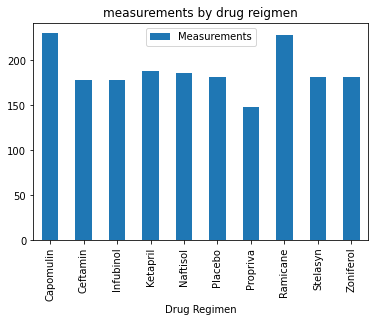

In [82]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measures_df = pd.DataFrame(reg_group["Drug Regimen"].count())
measures_final_df = measures_df.rename(columns={"Drug Regimen" : "Measurements"})
measures_final_df.plot(kind="bar", title = "measurements by drug reigmen")
plt.show()

([<matplotlib.axis.XTick at 0x1e866d63640>,
 [Text(0, 0, '230'),
  Text(1, 0, '178'),
  Text(2, 0, '178'),
  Text(3, 0, '188'),
  Text(4, 0, '186'),
  Text(5, 0, '181'),
  Text(6, 0, '148'),
  Text(7, 0, '228'),
  Text(8, 0, '181'),
  Text(9, 0, '182')])

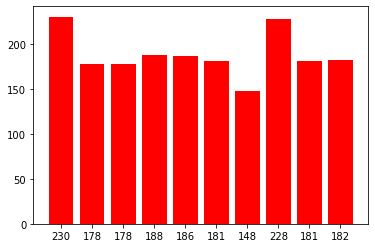

In [81]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(measures_final_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, measures_final_df["Measurements"], color='r', align="center")
plt.xticks(tick_locations, measures_final_df["Measurements"])

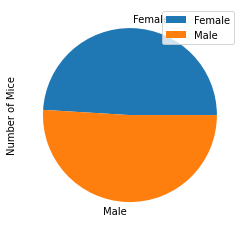

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_df.groupby(["Sex"])

gender_df = pd.DataFrame(gender_group["Sex"].count())
gender_final_df = gender_df.rename(columns={"Sex" : "Number of Mice"})
gender_final_df.plot(kind="pie", y = "Number of Mice")
plt.show()


([<matplotlib.patches.Wedge at 0x1e86dadd9a0>,
 [Text(-0.7320888280116858, -0.8210030133321538, 'Female'),
  Text(0.7320888280116862, 0.8210030133321533, 'Male')],
 [Text(-0.399321178915465, -0.447819825453902, '49.0%'),
  Text(0.39932117891546515, 0.4478198254539018, '51.0%')])

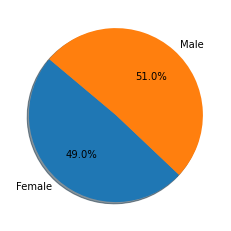

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]

plt.pie(gender_final_df["Number of Mice"], labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [94]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_dr_df = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = four_dr_df.groupby(["Mouse ID"])
mouse_max_tp_df = pd.DataFrame(mouse_group["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_max_tp_df


,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45
...,...
y769,45
y793,45
y865,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
